<a href="https://colab.research.google.com/github/Malikarbaaz/YES_BANK_CLOSE_PRICE_PREDICTION/blob/main/Yes_Bank_MLProject_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title :-  </u></b> <b> YES BANK STOCK CLOSING PRICE PREDICTION. <b>

#**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the |bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.** 


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv'

In [ ]:
# Reading our Dataset
data = pd.read_csv(file_path)

In [ ]:
# head gives the top 5 rows of the given dataset
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# importing datetime and converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
#set date as index
data.set_index('Date',inplace=True)

In [ ]:
data.head(3)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30


In [ ]:
# Creating a copy of dataframe
df = data.copy()

## **Here we creating a copy of dataframe because whatever we applying a conditions on the given data so that it doesn't affect our original dataset.**

In [ ]:
# describe() gives the overall descriptive summary of the dataframe
df.describe().transpose()        # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [ ]:
#info() print the basic information of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


In [ ]:
#  Shape give the total number of rows and columns
print('Rows {}  Columns {}'.format(data.shape[0], data.shape[1]))

Rows 185  Columns 4


In [ ]:
# Checking the total null values in our dataset.
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# Checking the totol number of duplicate values 
len(df[df.duplicated()])

0

## **As we see there are no null values also there are no duplicate values in our given dataset.**

In [ ]:
# Checking every column has similar rows/values by using count() function
df.count()

Open     185
High     185
Low      185
Close    185
dtype: int64

In [ ]:
# Creating a new variable and store the column in that variable
numeric_features = df.columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

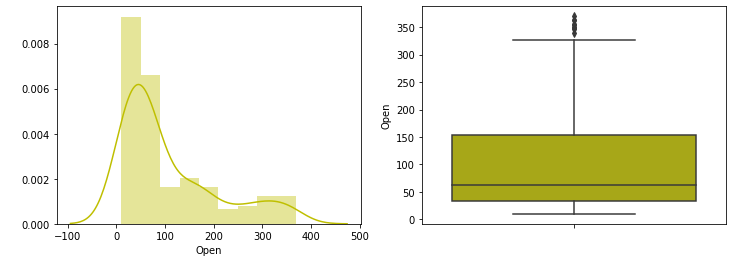

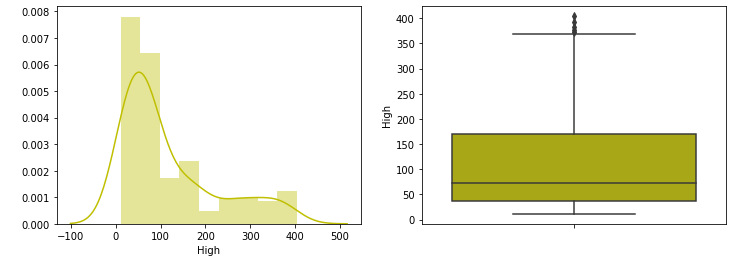

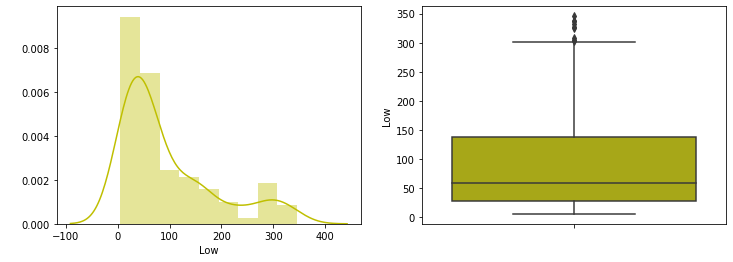

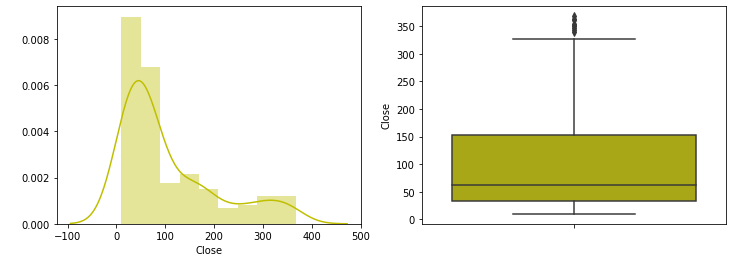

In [ ]:
#plots histogram for numerical variables
for var in numeric_features:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var], color="y")
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

# plotting boxplot to see the outliers
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var], color="y")
    fig.set_title('')
    fig.set_ylabel(var)

## **it is positively skewed**

###**when you looking this graph, this is not a perfect normal distribution, so we have to apply some kind of transformation to see it will look like a normal distribution or not.**

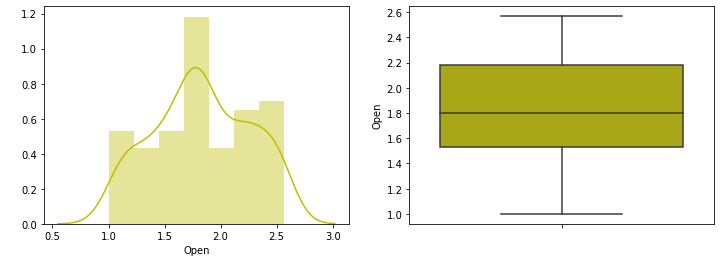

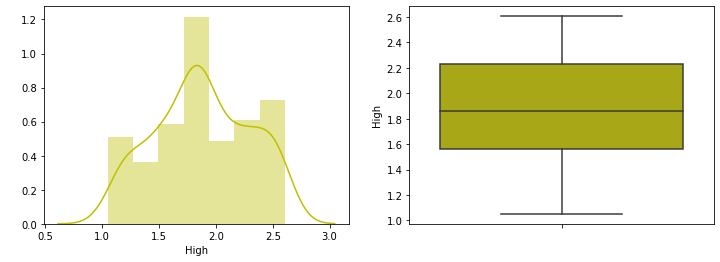

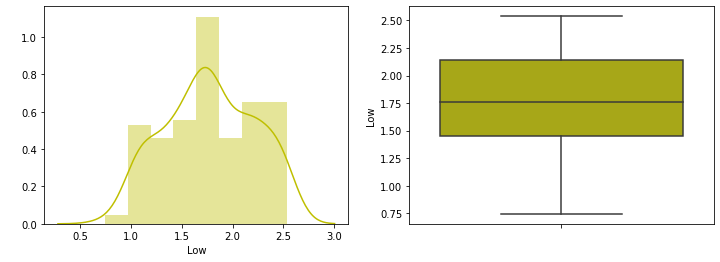

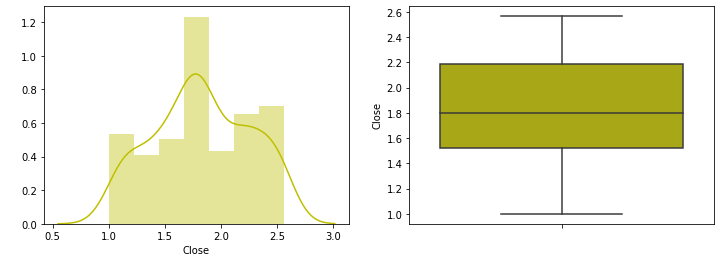

In [ ]:
#Using log transform
for var in numeric_features:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]), color="y")
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

# plotting boxplot to see the outliers are there or not.
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]), color="y")   #numpy log10() is a mathematical function that is used to get the natural logarithm of any object or an array with the base 10
    fig.set_title('')
    fig.set_ylabel(var)

##**it is not perfectly normal distribution but more or less its looking normal distribution.**

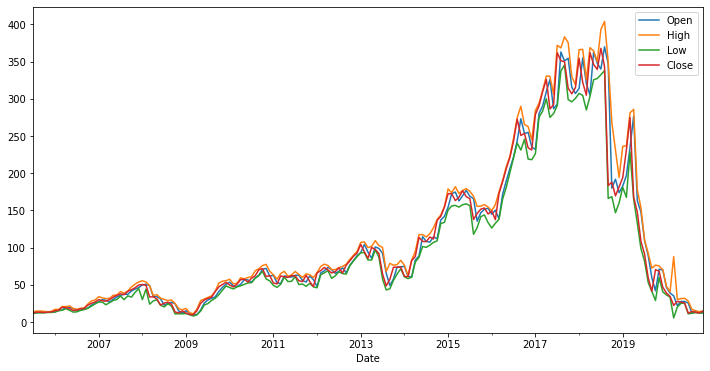

In [ ]:
df.plot.line(figsize=(12, 6))

##**The line graph shows that the stock price of yes bank was actully fall from 2018 onwards which shows the impact of 2018 fraud case involving Rana Kapoor for which it has been in the news.**

In [ ]:
# Date of maximum closing price
print('Maximum closing price:\n', df[df['Close']== df['Close'].max()])

# Date of minimum closing price
print('\n Minimum closing price:\n',df[df['Close']== df['Close'].min()])

Maximum closing price:
              Open    High     Low  Close
Date                                    
2018-07-01  340.0  393.35  332.45  367.9

 Minimum closing price:
             Open   High   Low  Close
Date                                
2009-03-01  10.0  11.24  8.16   9.98


In [ ]:
# Creating a dependent variable i.e 'y'
dependent_variable = 'Close'

# Create a list of independent variables i.e x1,x2,x3,.....xn
# Pandas tolist() is used to convert a series to list.
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['Low', 'High', 'Open']

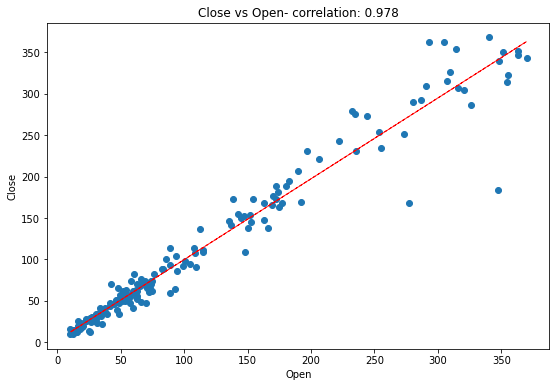

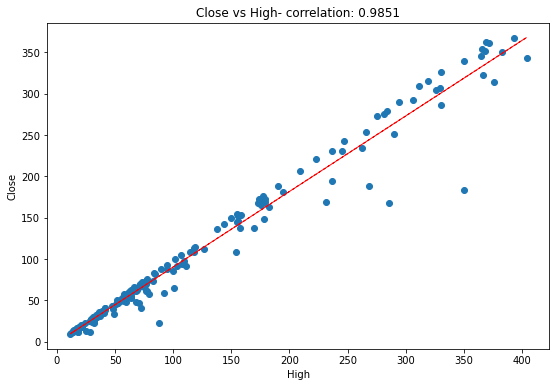

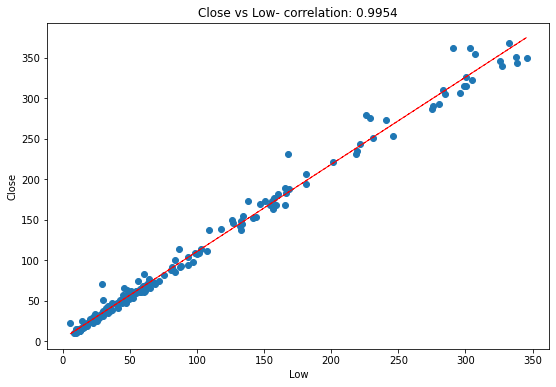

In [ ]:
# Scatterplot between independent and dependent variable
for col in df.columns[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),4)))    #here col is an independent_variables and we added correlation also so that how much my correlation is the data
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

## **We can clearly say that all the independent variables are linearly affecting of our dependent variable that means there is a strong correlation between all the independent variables.**

## **Now, let see more better correlation between all the features in our dataset by using heatmap.**

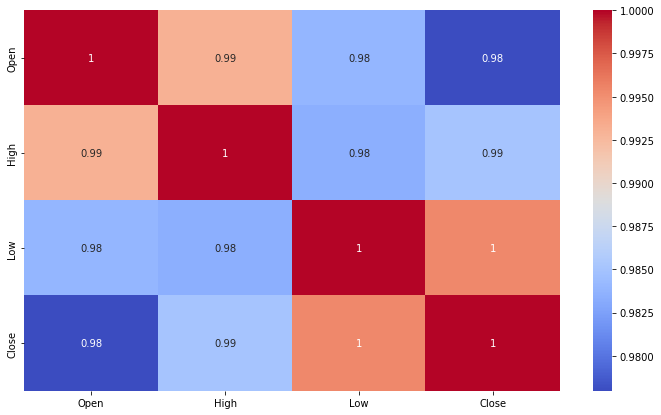

In [ ]:
# Checking Correlation 
plt.figure(figsize=(12,7))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## **By seeing the graph we conclude that each and every column is correlate to other column.**  

In [ ]:
# Create a variable to predict 'x' Months out into future
future_months = 3

###**This column will be the Dependent variable for predicting future close price. We are training our models to predict prices of future by 3 months.**

In [ ]:
df['Prediction'] = df[['Close']].shift(-future_months)
df.head()

,Open,High,Low,Close,Prediction
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.99
2005-08-01,12.58,14.88,12.55,13.42,13.41
2005-09-01,13.48,14.87,12.27,13.30,13.71
2005-10-01,13.20,14.47,12.40,12.99,15.33
2005-11-01,13.35,13.88,12.88,13.41,16.12


In [ ]:
# Create a column 'Prediction' and shift 'x' Months for future prediction
df['Prediction'] = df[['Close']].shift(-future_months)
df.head(10)

,Open,High,Low,Close,Prediction
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,13.42
2005-08-01,12.58,14.88,12.55,13.42,13.30
2005-09-01,13.48,14.87,12.27,13.30,12.99
2005-10-01,13.20,14.47,12.40,12.99,13.41
2005-11-01,13.35,13.88,12.88,13.41,13.71
2005-12-01,13.49,14.44,13.00,13.71,15.33
2006-01-01,13.68,17.16,13.58,15.33,16.12
2006-02-01,15.50,16.97,15.40,16.12,20.08
2006-03-01,16.20,20.95,16.02,20.08,19.49
